In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 300)
import warnings
warnings.filterwarnings('ignore')

In [2]:
def corr_random(n,mean,cov):
    '''
    功能：获取具备预设相关系数的随机数序列  作为股票收益率时间序列
    输入：1.随机数长度n
          2.随机数均值mean
          3.协方差矩阵cov
    输出：随机数序列 y
    '''
    # np.random.seed(0)
    num_samples = n
    mu = mean
    r = cov
    rng = np.random.default_rng()
    # 生成正态随机数序列
    y = rng.multivariate_normal(mu, r, num_samples,'raise')
    return y

In [3]:
n = 10000
mean = np.array([0.0, 0.0, 0.0])
rcov = np.array([
        [  3.40, -2.75, -2.00],
        [ -2.75,  5.50,  1.50],
        [ -2.00,  1.50,  1.25]
    ])
#调用函数
rdata = corr_random(n,mean,rcov)

<AxesSubplot:>

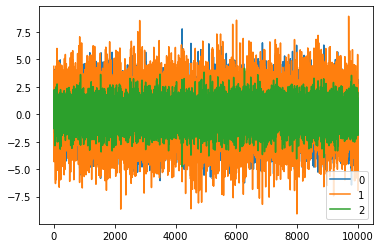

In [4]:
# 绘制符合rcov要求的随机数变化图
rdata = pd.DataFrame(rdata)
rdata.plot()

In [5]:
#检查cov是否与给定一致
temp = rdata.cov()
temp

,0,1,2
0,3.408051,-2.753419,-2.000929
1,-2.753419,5.453633,1.494443
2,-2.000929,1.494443,1.250730


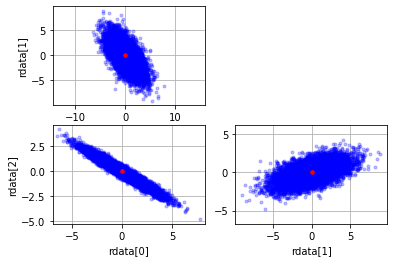

In [6]:
#观察生成的随机序列之间的散点图相关性
plt.subplot(2,2,1)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,1], 'b.', alpha=0.25)
plt.plot(mean[0], mean[1], 'ro', ms=3.5)
plt.ylabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(rdata.iloc[:,0], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[0], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[0]')
plt.ylabel('rdata[2]')
plt.axis('equal')
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(rdata.iloc[:,1], rdata.iloc[:,2], 'b.', alpha=0.25)
plt.plot(mean[1], mean[2], 'ro', ms=3.5)
plt.xlabel('rdata[1]')
plt.axis('equal')
plt.grid(True)

plt.show()